<a href="https://colab.research.google.com/github/MugdhaYada/my_projects-IDS/blob/main/Problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imported the data from the git

import pandas as pd

nutrition_subsetDF = pd.read_csv("https://raw.githubusercontent.com/MugdhaYada/my_projects-IDS/main/HW4/nutrition_subset.csv");
nutrition_subsetDF

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


I have given the path of my git repo where I have stored the data in the form of CSV.

In [ ]:
#Sorting the columns in descending order based on saturated_fat field

nutrition_subsetDF.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5,]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


Sorted the columns in descending order based on saturated_fat field.
* 1 cake of 'cheese cake' and 1/2gal of 'ice cream,vanila' has almost same amounts of the weight_in_grams and saturated fat but they differ in amount of cholestrol levels.
* 1 Cake of 'yellow cake' and 1/2 gal of 'ice cream,vanila' has only some differences in weight_in_grams, and some amount of difference in saturated fat and major difference in the amount of cholestrol.
* 1 Cake of 'yellow cake' and 1 pie of 'creme pie' has almost same amounts of saturated fat, and some amount of difference in weight_in_grams and major difference in the amount of cholestrol. 
* 1 cup of 'Lard' is not comparable with the top 4 values because their is a huge difference between the values.

In [ ]:
#created the new column 'saturated-fat_per_gram' by dividing 'saturated_fat' and 'weight_in_grams' fields

from tabulate import tabulate
nutrition_subsetDF['saturated_fat_per_gram'] = nutrition_subsetDF.apply(
    lambda row: row['saturated_fat']/row['weight_in_grams'],  
    axis = 1)    

print(tabulate(nutrition_subsetDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤════════════════════════════════════════╤═══════════════════╤═════════════════╤═══════════════╤══════════════════════════╕
│     │ food item                              │   weight_in_grams │   saturated_fat │   cholesterol │   saturated_fat_per_gram │
╞═════╪════════════════════════════════════════╪═══════════════════╪═════════════════╪═══════════════╪══════════════════════════╡
│   0 │ GELATIN; DRY                  1 ENVELP │              7    │             0   │             0 │              0           │
├─────┼────────────────────────────────────────┼───────────────────┼─────────────────┼───────────────┼──────────────────────────┤
│   1 │ SEAWEED; SPIRULINA; DRIED     1 OZ     │             28.35 │             0.8 │             0 │              0.0282187   │
├─────┼────────────────────────────────────────┼───────────────────┼─────────────────┼───────────────┼──────────────────────────┤
│   2 │ YEAST; BAKERS; DRY; ACTIVE    1 PKG    │              7    │             0   │    

created the new column 'saturated-fat_per_gram' by dividing 'saturated_fat' and 'weight_in_grams' fields.

In [ ]:
#Sorting the columns in descending order based on saturated_fat_per_gram field

nutrition_subsetDF.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5,]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


Sorting the columns in descending order based on saturated_fat_per_gram field.

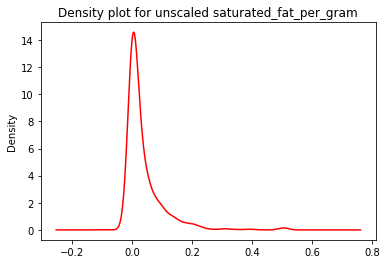

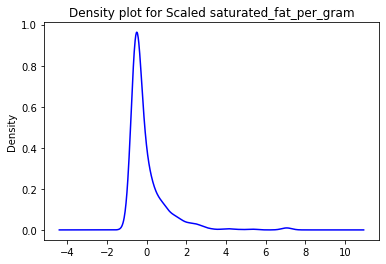

In [ ]:
# Standardizing the 'saturated_fat_per_gram' z-score and creating density plot
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subsetDF['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition_subsetDF.saturated_fat_per_gram, nan_policy='omit')

nutrition_subsetDF.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for unscaled saturated_fat_per_gram')
plt.show()

nutrition_subsetDF.scaled_saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled saturated_fat_per_gram')
plt.show()


Standardizing the 'saturated_fat_per_gram' by z-score and creating density plot for scaled and unscaled 'saturated_fat_per_gram' values.

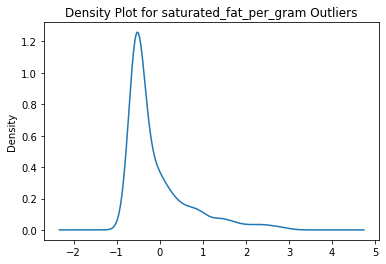

In [ ]:
#Determining the outliers of 'saturated_fat_per_gram' using three sigma thumb rule and creating a density plot for outliers

import matplotlib.pyplot as plt

nutrition_subsetDF_saturated_fat_per_gramOutliers = nutrition_subsetDF.query('~(scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)')['scaled_saturated_fat_per_gram']
nutrition_subsetDF_saturated_fat_per_gramOutliers.plot.density()
plt.title('Density Plot for saturated_fat_per_gram Outliers')
plt.show()

Finding the outliers of saturated_fat_per_gram by using the three sigma thumb rule and creating a density plot.

In [ ]:
#create a box plot for outliers
import plotly.express as px

boxplot = px.box(nutrition_subsetDF, y="saturated_fat_per_gram")

boxplot.show()

Box plot for the outliers of the saturated_fat_per_gram.
* There are 15 outliers for 'saturated_fat_per_gram' field and the values from 0.12 are outliers.

In [ ]:
# Load the imputer package
from sklearn.impute import SimpleImputer
import numpy as np


# also try mean or most_frequent
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

nutrition_subsetDF.saturated_fat_per_gram = imputer.fit_transform(nutrition_subsetDF['saturated_fat_per_gram'].values.reshape(-1,1))[:,0]

print(nutrition_subsetDF.saturated_fat_per_gram)

0      0.000000
1      0.028219
2      0.000000
3      0.190476
4      0.191000
         ...   
956    0.000000
957    0.000000
958    0.000000
959    0.000000
960    0.000000
Name: saturated_fat_per_gram, Length: 961, dtype: float64


* There are no missing values.

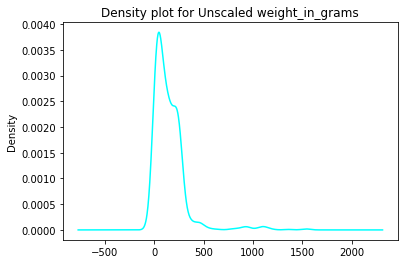

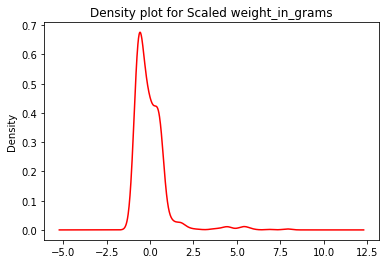

In [ ]:
#standardizing the weight_in_grams by calculating the zero mean
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subsetDF['scaled_weight_in_grams'] = stats.zscore(nutrition_subsetDF.weight_in_grams, nan_policy='omit')

nutrition_subsetDF.weight_in_grams.plot.density(color="cyan")
plt.title('Density plot for Unscaled weight_in_grams')
plt.show()


nutrition_subsetDF.scaled_weight_in_grams.plot.density(color="red")
plt.title('Density plot for Scaled weight_in_grams')
plt.show()

Standardizing the 'weight_in_grams'  by z-score and creating density plot for scaled and unscaled 'weight_in_grams' values.

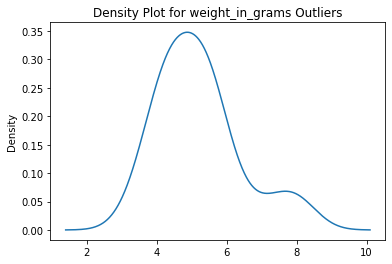

In [ ]:
#Determining the outliers of 'weight_in_grams' using three sigma thumb rule and creating a density plot for outliers

import matplotlib.pyplot as plt

nutrition_subsetDF_weight_in_gramsOutliers = nutrition_subsetDF.query('(scaled_weight_in_grams > 3 | scaled_weight_in_grams < -3)')['scaled_weight_in_grams']
nutrition_subsetDF_weight_in_gramsOutliers.plot.density()
plt.title('Density Plot for weight_in_grams Outliers')
plt.show()

Finding the outliers of weight_in_grams' by using the three sigma thumb rule and creating a density plot.

In [ ]:
#create a box plot for outliers
import plotly.express as px

boxplot = px.box(nutrition_subsetDF, y="weight_in_grams")

boxplot.show()

above is the box plot for the outliers of weight_in_grams.
* There are 22 outliers for 'weight_in_grams' field and the values from 514 are outliers.

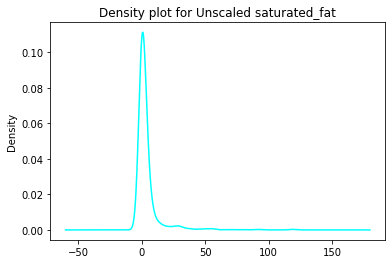

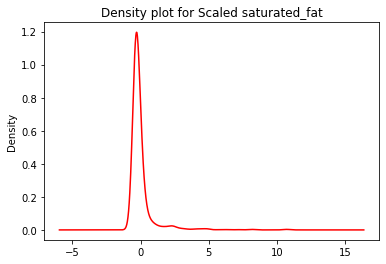

In [ ]:
#standardizing the saturated_fat by calculating the zero mean
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subsetDF['scaled_saturated_fat'] = stats.zscore(nutrition_subsetDF.saturated_fat, nan_policy='omit')

nutrition_subsetDF.saturated_fat.plot.density(color="cyan")
plt.title('Density plot for Unscaled saturated_fat')
plt.show()


nutrition_subsetDF.scaled_saturated_fat.plot.density(color="red")
plt.title('Density plot for Scaled saturated_fat')
plt.show()

Standardizing the 'saturated_fat'  by z-score and creating density plot for scaled and unscaled 'saturated_fat' values.

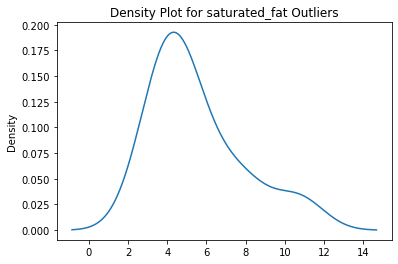

In [ ]:
#Determining the outliers of 'saturated_fat' using three sigma thumb rule and creating a density plot for outliers
import matplotlib.pyplot as plt

nutrition_subsetDF_saturated_fatOutliers = nutrition_subsetDF.query('(scaled_saturated_fat > 3 | scaled_saturated_fat < -3)')['scaled_saturated_fat']
nutrition_subsetDF_saturated_fatOutliers.plot.density()
plt.title('Density Plot for saturated_fat Outliers')
plt.show()

Finding the outliers of 'saturated_fat' by using the three sigma thumb rule and creating a density plot.

In [ ]:
#create a box plot for outliers
import plotly.express as px

boxplot = px.box(nutrition_subsetDF, y="saturated_fat")

boxplot.show()

Above is the box plot for the outliers of saturated_fat.
* There are 20 outliers for 'saturated_fat' field and the values from 8.3 are outliers.

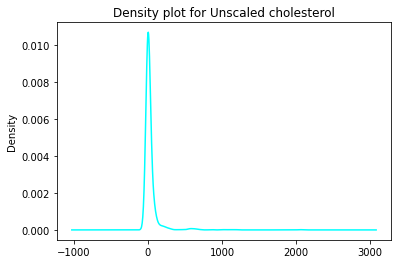

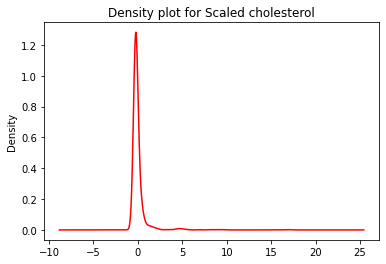

In [ ]:
#standardizing the cholesterol by calculating the zero mean
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subsetDF['scaled_cholesterol'] = stats.zscore(nutrition_subsetDF.cholesterol, nan_policy='omit')

nutrition_subsetDF.cholesterol.plot.density(color="cyan")
plt.title('Density plot for Unscaled cholesterol')
plt.show()


nutrition_subsetDF.scaled_cholesterol.plot.density(color="red")
plt.title('Density plot for Scaled cholesterol')
plt.show()

Standardizing the 'cholestrol'  by z-score and creating density plot for scaled and unscaled 'cholestrol' values.

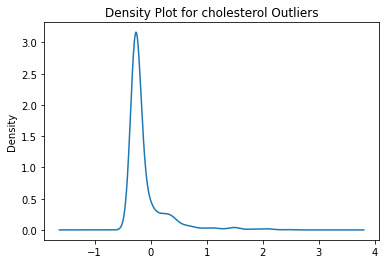

In [ ]:
#Determining the outliers of 'cholesterol' using three sigma thumb rule and creating a density plot for outliers
import matplotlib.pyplot as plt

nutrition_subsetDF_cholesterolOutliers = nutrition_subsetDF.query('~(scaled_cholesterol > 3 | scaled_cholesterol < -3)')['scaled_cholesterol']
nutrition_subsetDF_cholesterolOutliers.plot.density()
plt.title('Density Plot for cholesterol Outliers')
plt.show()

Finding the outliers of 'cholestrol' by using the three sigma thumb rule and creating a density plot.

In [ ]:
#create a box plot for outliers
import plotly.express as px

boxplot = px.box(nutrition_subsetDF, y="cholesterol")

boxplot.show()

Above is the box plot for outliers of cholestrol.
* There are 17 outliers for 'cholestrol' field and the values from 51 are outliers.

**Summary:**
* After sorting the data set based on the saturated_fat, we can observe that 'Cheese cake' has highest saturated_fat of 119.9.
* 1 cake of 'cheese cake' and 1/2gal of 'ice cream,vanila' has almost same amounts of the weight_in_grams and saturated fat but they differ in amount of cholestrol levels.
* 1 Cake of 'yellow cake' and 1/2 gal of 'ice cream,vanila' has only some differences in weight_in_grams, and some amount of difference in saturated fat and major difference in the amount of cholestrol.
* 1 Cake of 'yellow cake' and 1 pie of 'creme pie' has almost same amounts of saturated fat, and some amount of difference in weight_in_grams and major difference in the amount of cholestrol. 
* 1 cup of 'Lard' is not comparable with the top 4 values because their is a huge difference between the values.
* After sorting the data set based on the saturated_fat_per_gram, we can observe that 'Butter,salted and Butter,unsalted' has same saturated_fat_per_gram and they have the highest saturated_fat_per_gram of 0.507.
* There are 15 outliers for 'saturated_fat_per_gram' field and the values from 0.12 are outliers.
* There are no missing values.
* There are 22 outliers for 'weight_in_grams' field and the values from 514 are outliers.
* There are 20 outliers for 'saturated_fat' field and the values from 8.3 are outliers.
* There are 17 outliers for 'cholestrol' field and the values from 51 are outliers.







